# Data Visualization on Exchange Rates

In [1]:
import pandas as pd
exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')
print(exchange_rates.head(5))
print(exchange_rates.tail(5))
print(exchange_rates.info())

  Period\Unit: [Australian dollar ] [Bulgarian lev ] [Brazilian real ]  \
0   2021-05-06               1.5547           1.9558            6.4707   
1   2021-05-05               1.5510           1.9558            6.5174   
2   2021-05-04               1.5608           1.9558            6.5785   
3   2021-05-03               1.5573           1.9558            6.5507   
4   2021-04-30               1.5581           1.9558            6.4597   

  [Canadian dollar ] [Swiss franc ] [Chinese yuan renminbi ] [Cypriot pound ]  \
0             1.4764         1.0953                   7.8054              NaN   
1             1.4731         1.0965                   7.7636              NaN   
2             1.4836         1.0980                   7.8136              NaN   
3             1.4807         1.1016                   7.7967              NaN   
4             1.4834         1.0998                   7.8134              NaN   

  [Czech koruna ] [Danish krone ]  ... [Romanian leu ] [Russian roub

There are 5 rows and 41 columns. Some of the colums have null values in them. There are tow data types present in the dataset with most of them being a string type and three of them belonging to the decimal type.

In [2]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)
euro_to_dollar = exchange_rates.loc[:,['Time','US_dollar']]
euro_to_dollar.drop(euro_to_dollar[euro_to_dollar['US_dollar'] == '-'].index,inplace = True)
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype('float')


## Calculating the Rolling Mean

In [3]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()

The story we are going to create here is how the euro-dollar rate changed under the last three presidents.

In [4]:
bush_obama_trump = euro_to_dollar.copy()[(euro_to_dollar['Time'].dt.year >= 2001) & 
                                         (euro_to_dollar['Time'].dt.year < 2021)]
bush = bush_obama_trump.copy()[bush_obama_trump['Time'].dt.year < 2009]
obama = bush_obama_trump.copy()[(bush_obama_trump['Time'].dt.year >= 2009) & 
                                (bush_obama_trump['Time'].dt.year < 2017)]
trump = bush_obama_trump.copy()[(bush_obama_trump['Time'].dt.year >= 2017) & 
                                (bush_obama_trump['Time'].dt.year < 2021)]

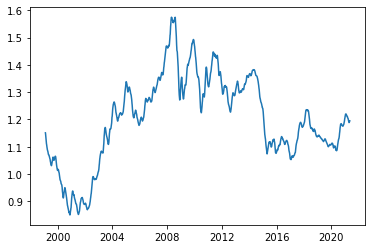

In [5]:
import matplotlib.pyplot as plt
import matplotlib.style as style

plt.plot(euro_to_dollar['Time'],euro_to_dollar['rolling_mean'])



<ipython-input-23-6f08680c1030>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['', '2001', '', '2003', '', '2005', '',
<ipython-input-23-6f08680c1030>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', '2009', '', '2011', '', '2013', '',
<ipython-input-23-6f08680c1030>:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(['2017', '', '2018', '', '2019', '',


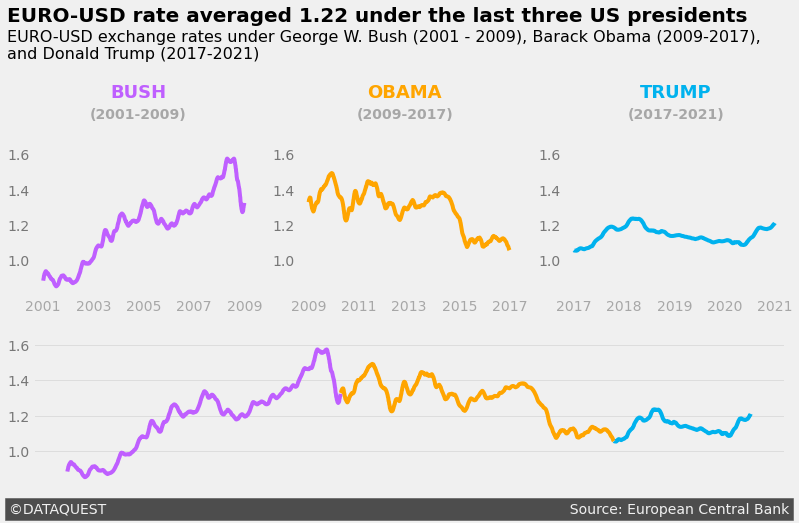

In [23]:
style.use('fivethirtyeight')
plt.figure(figsize = (12,6))
ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)
ax4 = plt.subplot(2,1,2)
axes = [ax1, ax2, ax3, ax4]
for ax in axes:
    ax.set_ylim(0.8,1.7)
    ax.set_yticks([1.0,1.2,1.4,1.6])
    ax.set_yticklabels(['1.0','1.2','1.4','1.6'], alpha = 0.5)
    ax.grid(alpha = 0.5)
## Bush
ax1.plot(bush['Time'],bush['rolling_mean'],color='#BF5FFF')
ax1.set_xticklabels(['', '2001', '', '2003', '', '2005', '',
                     '2007', '', '2009'],
                   alpha=0.3)
ax1.text(12300, 1.92, 'BUSH', fontsize=18, weight='bold',
        color='#BF5FFF')
ax1.text(12000, 1.8, '(2001-2009)', weight='bold',
        alpha=0.3)

#Obama
ax2.plot(obama['Time'], obama['rolling_mean'],
        color='#ffa500')
ax2.set_xticklabels(['', '2009', '', '2011', '', '2013', '',
                     '2015', '', '2017'],
                   alpha=0.3)
ax2.text(15100, 1.92, 'OBAMA', fontsize=18, weight='bold',
        color='#ffa500')
ax2.text(14950, 1.8, '(2009-2017)', weight='bold',
         alpha=0.3)

#Trump
ax3.plot(trump['Time'], trump['rolling_mean'],
        color='#00B2EE')
ax3.set_xticklabels(['2017', '', '2018', '', '2019', '',
                     '2020', '', '2021'],
                   alpha=0.3)
ax3.text(17650, 1.92, 'TRUMP', fontsize=18, weight='bold',
        color='#00B2EE')
ax3.text(17560, 1.8, '(2017-2021)', weight='bold',
         alpha=0.3)

#Bush-Obama-Trump
ax4.plot(bush['Time'], bush['rolling_mean'],
        color='#BF5FFF')
ax4.plot(obama['Time'], obama['rolling_mean'],
        color='#ffa500')
ax4.plot(trump['Time'], trump['rolling_mean'],
        color='#00B2EE')
ax4.grid(alpha=0.5)
ax4.set_xticks([])

ax1.text(10800, 2.35, 'EURO-USD rate averaged 1.22 under the last three US presidents',
         fontsize=20, weight='bold')
ax1.text(10800, 2.14, '''EURO-USD exchange rates under George W. Bush (2001 - 2009), Barack Obama (2009-2017),
and Donald Trump (2017-2021)''',
        fontsize=16)

ax4.text(10700, 0.65, '©DATAQUEST' + ' '*103 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=14)

plt.show()